# Determining the Quadrant of an Angle

<div class="alert alert-block alert-info">
    Keep in mind that this is a very simple problem, and using machine learning for it might be overkill. However, it serves as a basic example.
</div>

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [50]:
# Generate some training data
angles = np.random.uniform(0, 360, 1000)  # Random angles between 0 and 360 degrees
quadrants = (np.floor(angles / 90) % 4).astype(int)  # Determine the quadrant

In [51]:
# One-hot encode the quadrants
quadrants_one_hot = to_categorical(quadrants, num_classes=4)

In [52]:
# Reshape the data for training
X = angles.reshape(-1, 1)
y = quadrants_one_hot

In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Create a simple neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [55]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
25/25 [==============================] - 1s 24ms/step - loss: 42.6107 - accuracy: 0.2587 - val_loss: 38.4822 - val_accuracy: 0.2600
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 31.6244 - accuracy: 0.2587 - val_loss: 27.3336 - val_accuracy: 0.2600
Epoch 3/50
25/25 [==============================] - 0s 9ms/step - loss: 24.5594 - accuracy: 0.2175 - val_loss: 22.9862 - val_accuracy: 0.2600
Epoch 4/50
25/25 [==============================] - 0s 8ms/step - loss: 20.4703 - accuracy: 0.2188 - val_loss: 19.2504 - val_accuracy: 0.2800
Epoch 5/50
25/25 [==============================] - 0s 8ms/step - loss: 17.1049 - accuracy: 0.2113 - val_loss: 15.9939 - val_accuracy: 0.2350
Epoch 6/50
25/25 [==============================] - 0s 8ms/step - loss: 14.1034 - accuracy: 0.2975 - val_loss: 12.9922 - val_accuracy: 0.2800
Epoch 7/50
25/25 [==============================] - 0s 10ms/step - loss: 11.3188 - accuracy: 0.2475 - val_loss: 10.3728 - val_accuracy: 0.3000
Epoc

In [57]:
# Test the model with a new angle
new_angle = np.array([150])
predicted_probs = model.predict(new_angle.reshape(-1, 1))
predicted_quadrant = np.argmax(predicted_probs)

1/1 [==============================] - 0s 84ms/step


In [58]:
print(f"The predicted quadrant for {new_angle[0]} degrees is {predicted_quadrant}")

The predicted quadrant for 150 degrees is 3


# Visualize the Behavior of the Neural Network
## by plotting the decision boundaries it has learned.

In [59]:
import matplotlib.pyplot as plt

In [60]:
# Generate angles for visualization
angles_vis = np.linspace(0, 360, 1000)
X_vis = angles_vis.reshape(-1, 1)

In [61]:
# Predict the quadrants for the visualization angles
predictions_vis = model.predict(X_vis)

32/32 [==============================] - 0s 3ms/step


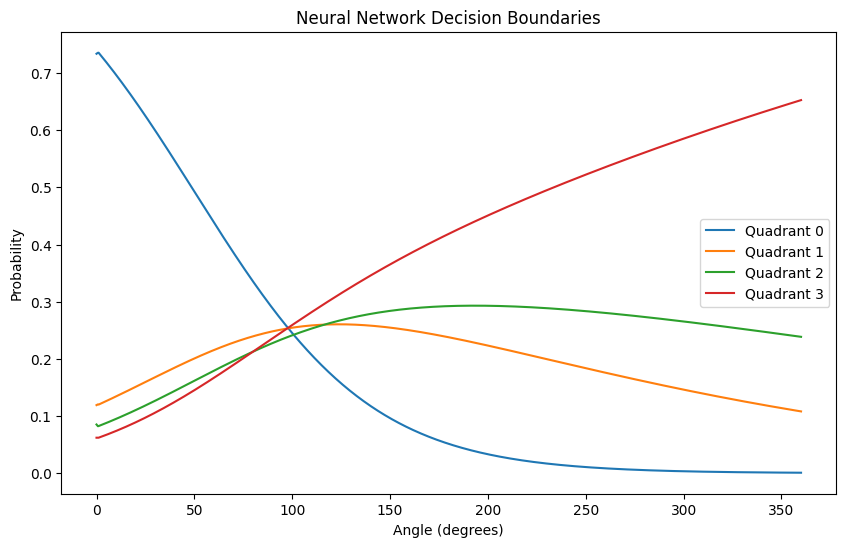

In [62]:
# Plot the decision boundaries
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(angles_vis, predictions_vis[:, i], label=f'Quadrant {i}')

plt.title('Neural Network Decision Boundaries')
plt.xlabel('Angle (degrees)')
plt.ylabel('Probability')
plt.legend()
plt.show()

This code generates a plot that shows the probability assigned by the model to each quadrant for a range of angles. Each line represents the probability assigned to one of the four quadrants. You should see that for each quadrant, there's a range of angles where the model assigns a high probability to that quadrant.

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a simple neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 4)                 44        
                                                                 
Total params: 64 (256.00 Byte)
Trainable params: 64 (256.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Plotly

The purpose of the provided Plotly code is to visually represent a simple neural network architecture in an interactive and graphical format. The code uses the 'plotly.graph_objects' library to create a figure that consists of nodes (representing units) and edges (representing connections) between these nodes. The resulting plot provides a visual representation of the structure of the neural network.

This code creates an interactive visualization of the neural network architecture, where you can hover over nodes and connections for more information.

The purpose of this visualization is to provide a graphical representation of the neural network's structure, making it easier to understand the arrangement of layers and connections between units. While this example is relatively simple, such visualizations become increasingly valuable for more complex neural networks. Don't get me wrong but there is no use of it here, why I did that because I want to show off, this goes to LinkedIn you know.

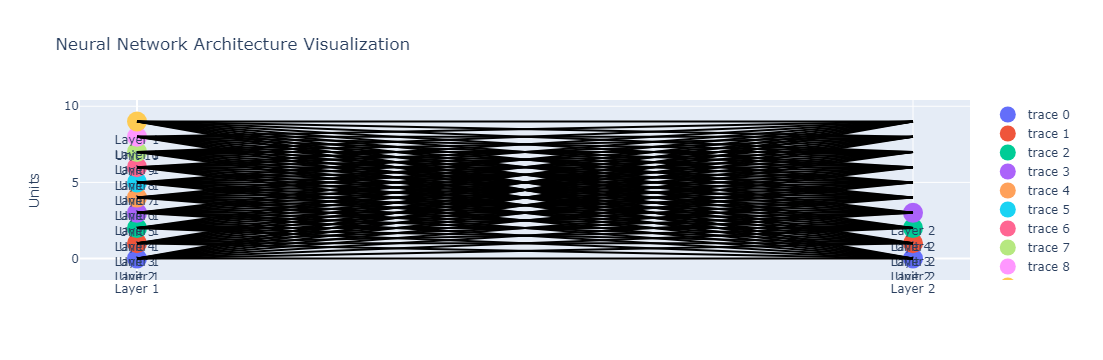

In [64]:
'''
In this part, we import the necessary libraries. 
plotly.graph_objects is used for creating interactive plots, 
and we import Sequential and Dense from Keras to create a simple neural network.
'''

import plotly.graph_objects as go
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a simple neural network model

'''
Here, we define a simple neural network with one hidden layer 
(Dense layer with 10 units and ReLU activation) and an output 
layer with 4 units and softmax activation.
'''

model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Get the model layers
'''
We extract the layers of the model. 
This list, layers, contains the information about each layer in the neural network.
Nutshell, the layers of the model are extracted into a list called layers.
'''

layers = [layer for layer in model.layers]

# Create a plotly figure
'''
We create a Plotly figure, which is the canvas for our plot.
'''
fig = go.Figure()

# Add nodes for each layer
'''
In this loop, we add nodes (representing units) for each layer. 
Each node is a circle marker with a label indicating the layer and unit it represents.
'''
for i, layer in enumerate(layers):
    for unit in range(layer.output_shape[1]):
        fig.add_trace(go.Scatter(x=[i], y=[unit], mode='markers+text', text=[f'Layer {i+1}<br>Unit {unit+1}'],
                                 textposition='bottom center', marker=dict(size=20, symbol='circle')))

# Add edges connecting the nodes
'''
This loop adds edges (lines) connecting the nodes. 
Each line connects a unit in one layer to a unit in the next layer, 
creating a representation of the connections between units.
'''
for i in range(len(layers) - 1):
    for unit1 in range(layers[i].output_shape[1]):
        for unit2 in range(layers[i + 1].input_shape[1]):
            fig.add_trace(go.Scatter(x=[i, i+1], y=[unit1, unit2], mode='lines', line=dict(color='black')))

# Set layout options
'''
We set layout options, including the title and axis labels, to make the plot more informative.
'''
fig.update_layout(title='Neural Network Architecture Visualization',
                  xaxis=dict(tickvals=list(range(len(layers))), ticktext=[f'Layer {i+1}' for i in range(len(layers))]),
                  yaxis=dict(title='Units'))

# Show the plot
'''
Finally, we display the interactive plot. 
This code creates an interactive visualization of the neural network architecture, 
where you can hover over nodes and connections for more information.
'''
fig.show()


## The data that plotly gives:

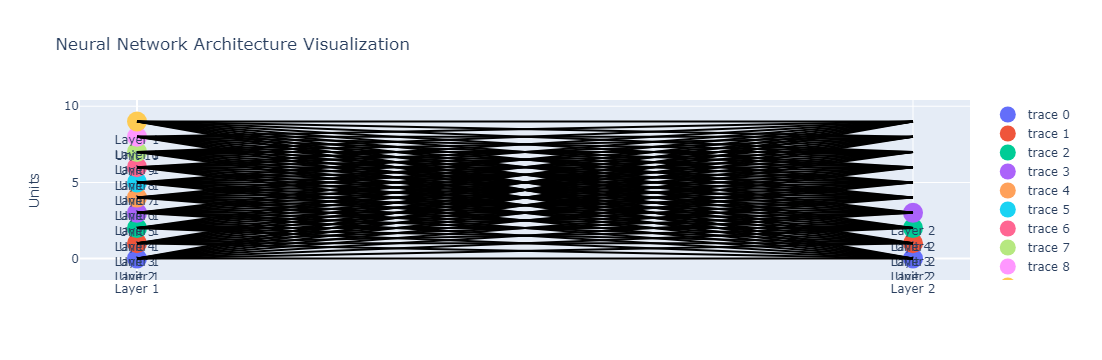